*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-12-29 00:29:59--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.2’

train-data.tsv.2    100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2021-12-29 00:29:59 (8.53 MB/s) - ‘train-data.tsv.2’ saved [358233/358233]

--2021-12-29 00:30:00--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.2’

valid-data.tsv.2    100%[========

In [3]:
df_train = pd.read_csv(train_file_path, sep="\t", header=None, names=['Label', 'Text'])
df_train

,Label,Text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [4]:
df_test = pd.read_csv(test_file_path, sep="\t", header=None, names=['Label', 'Text'])
df_test

,Label,Text
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


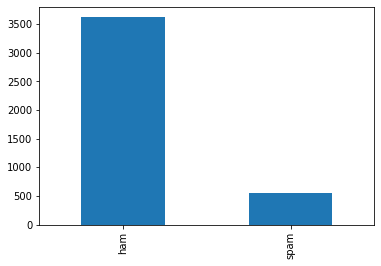

In [5]:
df_train['Label'].value_counts().plot.bar()

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = stopwords.words('english')
df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
df_train

,Label,Text
0,ham,"ahhhh...just woken up!had bad dream u tho,so d..."
1,ham,never nothing
2,ham,"u sound like manky scouse boy steve,like! trav..."
3,ham,mum say wan go go... shun bian watch da glass ...
4,ham,never lei... v lazy... got wat? dat day ü send...
...,...,...
4174,ham,woke up. yeesh late. fall asleep til &lt;#&gt; :/
4175,ham,"u reckon need 2 arrange transport u can't it, ..."
4176,spam,free entry £250 weekly competition text word w...
4177,spam,-pls stop bootydelious (32/f) inviting friend....


In [10]:
df_train["Text"] = df_train['Text'].str.replace('[^\w\s]','')
df_test["Text"] = df_test['Text'].str.replace('[^\w\s]','')

In [11]:
df_train

,Label,Text
0,ham,ahhhhjust woken uphad bad dream u thoso dont l...
1,ham,never nothing
2,ham,u sound like manky scouse boy stevelike travel...
3,ham,mum say wan go go shun bian watch da glass exh...
4,ham,never lei v lazy got wat dat day ü send da url...
...,...,...
4174,ham,woke up yeesh late fall asleep til ltgt
4175,ham,u reckon need 2 arrange transport u cant it th...
4176,spam,free entry 250 weekly competition text word wi...
4177,spam,pls stop bootydelious 32f inviting friend repl...


In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.stem import WordNetLemmatizer 

# Use English stemmer.
lemmatizer = WordNetLemmatizer()
df_train['Text'] = df_train['Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df_test['Text'] = df_test['Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [14]:
df_train['Text'][:5]

0    ahhhhjust woken uphad bad dream u thoso dont l...
1                                        never nothing
2    u sound like manky scouse boy stevelike travel...
3    mum say wan go go shun bian watch da glass exh...
4    never lei v lazy got wat dat day ü send da url...
Name: Text, dtype: object

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

Using TensorFlow backend.


In [16]:
VOCAB_SIZE = 2000
MAXLEN = 500

In [17]:
tokenizer = Tokenizer(num_words= VOCAB_SIZE, filters='')
tokenizer.fit_on_texts(df_train['Text'])

In [18]:
sequences = tokenizer.texts_to_sequences(df_train['Text'])
padding_train = sequence.pad_sequences(sequences, maxlen= MAXLEN) 
padding_train

array([[  0,   0,   0, ..., 222,   3,  37],
       [  0,   0,   0, ...,   0, 189, 249],
       [  0,   0,   0, ...,   8, 339, 455],
       ...,
       [  0,   0,   0, ...,  18, 210, 146],
       [  0,   0,   0, ...,  40, 618, 948],
       [  0,   0,   0, ..., 159,   6, 108]], dtype=int32)

In [19]:
padding_train.shape

(4179, 500)

In [20]:
sequences_test = tokenizer.texts_to_sequences(df_test['Text'])
padding_test = sequence.pad_sequences(sequences_test, maxlen= MAXLEN) 
padding_test

array([[   0,    0,    0, ...,  857,   41,  411],
       [   0,    0,    0, ...,   61,  718,   21],
       [   0,    0,    0, ...,    1,   97,   30],
       ...,
       [   0,    0,    0, ...,  121,   69,   25],
       [   0,    0,    0, ...,  587, 1019, 1419],
       [   0,    0,    0, ...,   26,   40,  285]], dtype=int32)

In [21]:
padding_test.shape

(1392, 500)

In [22]:
y_train = pd.factorize(df_train['Label'])[0]
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [23]:
y_test = pd.factorize(df_test['Label'])[0]
len(y_test)

1392

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(VOCAB_SIZE, 32), # 32 stands for the dimension of vectors generated
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 72,353
Trainable params: 72,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy']
)

In [27]:
history = model.fit(padding_train, y_train,
              batch_size=128, epochs=10,
              validation_split=0.2)

Epoch 1/10
27/27 [==============================] - 11s 395ms/step - loss: 0.4068 - accuracy: 0.8459 - val_loss: 0.3411 - val_accuracy: 0.8612
Epoch 2/10
27/27 [==============================] - 13s 493ms/step - loss: 0.2276 - accuracy: 0.9013 - val_loss: 0.2560 - val_accuracy: 0.8864
Epoch 3/10
27/27 [==============================] - 9s 340ms/step - loss: 0.1432 - accuracy: 0.9611 - val_loss: 0.1205 - val_accuracy: 0.9593
Epoch 4/10
27/27 [==============================] - 9s 341ms/step - loss: 0.0937 - accuracy: 0.9782 - val_loss: 0.0896 - val_accuracy: 0.9749
Epoch 5/10
27/27 [==============================] - 9s 337ms/step - loss: 0.0657 - accuracy: 0.9853 - val_loss: 0.0622 - val_accuracy: 0.9856
Epoch 6/10
27/27 [==============================] - 9s 339ms/step - loss: 0.0521 - accuracy: 0.9877 - val_loss: 0.0605 - val_accuracy: 0.9856
Epoch 7/10
27/27 [==============================] - 13s 479ms/step - loss: 0.0446 - accuracy: 0.9880 - val_loss: 0.0564 - val_accuracy: 0.9868
Epo

In [37]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  sequences = tokenizer.texts_to_sequences(pd.Series(pred_text))
  padding_pred = sequence.pad_sequences(sequences, maxlen= MAXLEN) 
  # print(padding_pred)
  prob = model.predict(padding_pred)[0][0]
  prediction = [prob]
  if prob > 0.5:
    prediction.append('spam')
  else:
    prediction.append('ham')

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[0.0076339245, 'ham']


In [38]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

You passed the challenge. Great job!
